In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

In [6]:
# Set path to your data folder
points_folder = "data/points/"

# Initialize lists to store labels
labels = []

# Assign numerical labels to each person
label_mapping = {}  # To map person names to numerical labels
label_counter = 0

# Loop through each person's folder
for person_folder in os.listdir(points_folder):
    if os.path.isdir(os.path.join(points_folder, person_folder)):
        label_mapping[person_folder] = label_counter
        label_counter += 1

        person_points_path = os.path.join(points_folder, person_folder)
        for points_file in os.listdir(person_points_path):
            if points_file.endswith(".csv"):
                labels.append(label_mapping[person_folder])

# Convert labels list to numpy array
labels = np.array(labels)

# Split the labels into training and testing sets
train_labels, test_labels = train_test_split(labels, test_size=0.2, random_state=42)

# Print label mapping
print("Label Mapping:", label_mapping)
print("Train Labels Shape:", train_labels.shape)
print("Test Labels Shape:", test_labels.shape)


Label Mapping: {'ali': 0, 'huzaifa': 1, 'junaid': 2, 'salman': 3}
Train Labels Shape: (506,)
Test Labels Shape: (127,)


In [9]:
labels.shape

(633,)

In [16]:
import os
import numpy as np

# Set path to your data folder
points_folder = "data/points"

# Initialize a list to store skeletal points data
all_skeletal_points = []

# Loop through each person's folder
for person_folder in os.listdir(points_folder):
    if os.path.isdir(os.path.join(points_folder, person_folder)):
        person_points_path = os.path.join(points_folder, person_folder)
        for points_file in os.listdir(person_points_path):
            if points_file.endswith(".csv"):
                points_file_path = os.path.join(person_points_path, points_file)
                
                # Load skeletal points from CSV
                skeletal_points = np.genfromtxt(points_file_path, delimiter=',', skip_header=0, usecols=range(2, 53))
                all_skeletal_points.append(skeletal_points)  # Append as is

# Convert the list of arrays to a single numpy array
data = np.array(all_skeletal_points)

# Print data shape
print("Data Shape:", data.shape)


Data Shape: (633, 30, 51)


In [17]:
def count_occurrences(arr):
    unique_elements, counts = np.unique(arr, return_counts=True)
    occurrences_dict = dict(zip(unique_elements, counts))
    return occurrences_dict
print(count_occurrences(labels))

{0: 147, 1: 145, 2: 138, 3: 203}


## LSTM

In [19]:
X_Lstm, X_val_lstm, y_lstm, y_val_lstm = train_test_split(data, labels, test_size=0.25, random_state=42)
print(X_Lstm.shape)
print(y_lstm.shape)
print(X_val_lstm.shape)
print(y_val_lstm.shape)

(474, 30, 51)
(474,)
(159, 30, 51)
(159,)


## Conv3D

In [26]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense
import tensorflow as tf

# Function to load and preprocess the video frames
def load_video_frames(video_path, num_frames=30, image_shape=(64, 64)):
    frames = []
    cap = cv2.VideoCapture(video_path)

    # Get total frames and calculate skip_frames to sample equally from the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # skip_frames = max(total_frames // num_frames, 1)

    # Loop through the frames with the adjusted skip_frames
    for i in range(0, total_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, image_shape)
            frames.append(frame)

    cap.release()

    # Pad frames if the video has fewer frames than required
    if len(frames) < num_frames:
        print("Length of frames is ",len(frames));
        print("Number of frames is ",num_frames)
        frames.extend([frames[-1]] * (num_frames - len(frames)))
        # indices = np.linspace(0, len(frames) - 1, num_frames, dtype=np.int)
        # frames = [frames[i] for i in indices]    
    elif len(frames) > num_frames:
        # If the number of frames is greater, perform downsampling
        downsample_factor = len(frames) // num_frames
        indices = np.arange(0, len(frames), downsample_factor)[:num_frames]
        frames = [frames[i] for i in indices]
    print("Length of frames is ",len(frames))
    return np.array(frames)

# Function to load all videos and their labels from the root folder
def load_data(root_folder):
    class_labels = os.listdir(root_folder)
    videos = []
    labels = []

    for i, class_label in enumerate(class_labels):
        class_folder = os.path.join(root_folder, class_label)
        video_files = os.listdir(class_folder)

        for video_file in video_files:
            video_path = os.path.join(class_folder, video_file)
            frames = load_video_frames(video_path)
            videos.append(frames)
            print( np.array(videos).shape )
            labels.append(i)

    return np.array(videos), np.array(labels) , np.array(class_labels)


In [27]:
root_folder = 'data/videos/'
with tf.device("CPU"):
    videos, labels , class_label = load_data(root_folder)
    # Split data into training and testing sets
    X_conv3d, X_val_conv3d, y_conv3d, y_val_conv3d = train_test_split(videos, labels, test_size=0.25, random_state=42)

Length of frames is  30
(1, 30, 64, 64, 3)
Length of frames is  30
(2, 30, 64, 64, 3)
Length of frames is  30
(3, 30, 64, 64, 3)
Length of frames is  30
(4, 30, 64, 64, 3)
Length of frames is  30
(5, 30, 64, 64, 3)
Length of frames is  30
(6, 30, 64, 64, 3)
Length of frames is  30
(7, 30, 64, 64, 3)
Length of frames is  30
(8, 30, 64, 64, 3)
Length of frames is  30
(9, 30, 64, 64, 3)
Length of frames is  30
(10, 30, 64, 64, 3)
Length of frames is  30
(11, 30, 64, 64, 3)
Length of frames is  30
(12, 30, 64, 64, 3)
Length of frames is  30
(13, 30, 64, 64, 3)
Length of frames is  30
(14, 30, 64, 64, 3)
Length of frames is  30
(15, 30, 64, 64, 3)
Length of frames is  30
(16, 30, 64, 64, 3)
Length of frames is  30
(17, 30, 64, 64, 3)
Length of frames is  30
(18, 30, 64, 64, 3)
Length of frames is  30
(19, 30, 64, 64, 3)
Length of frames is  30
(20, 30, 64, 64, 3)
Length of frames is  30
(21, 30, 64, 64, 3)
Length of frames is  30
(22, 30, 64, 64, 3)
Length of frames is  30
(23, 30, 64, 64, 

In [28]:
print("Class Labels: ", class_label)
print(type(X_conv3d))
print(type(y_conv3d))
print(type(X_val_conv3d))
print(type(y_val_conv3d))
print("The shape of X_conv3d is: ", X_conv3d.shape)
print("The shape of y_conv3d is: ", y_conv3d.shape)
print("The total number of labels is: ", len(np.unique(labels)))

Class Labels:  ['ali' 'huzaifa' 'junaid' 'salman']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
The shape of X_conv3d is:  (474, 30, 64, 64, 3)
The shape of y_conv3d is:  (474,)
The total number of labels is:  4


In [29]:
input_shape = X_conv3d.shape[1:]
print(input_shape)

(30, 64, 64, 3)


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Conv3D, Flatten
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Model

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Conv3D, Flatten, Dense, LSTM, Input, Concatenate

def simple_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        Conv3D(2, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])
    return model

def simple_lstm(sequence_length, features, num_classes):
    model = tf.keras.Sequential()
    model.add(LSTM(64, input_shape=(sequence_length, features)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def late_fusion_model(conv3d_input_shape, lstm_input_shape, num_classes):
    conv3d_input = Input(shape=conv3d_input_shape)
    lstm_input = Input(shape=lstm_input_shape)

    conv3d_model = simple_model(conv3d_input_shape, num_classes)
    lstm_model = simple_lstm(lstm_input_shape[0], lstm_input_shape[1], num_classes)

    # Load pre-trained weights for the Conv3D model
    # conv3d_model.load_weights("../simple_model_weights.h5")

    # Load pre-trained weights for the LSTM model
    # lstm_model.load_weights("./lstm_model.h5")

    conv3d_output = conv3d_model(conv3d_input)
    lstm_output = lstm_model(lstm_input)

    # Perform late fusion by concatenating the probabilities from both models
    fused_output = Concatenate()([conv3d_output, lstm_output])
    fused_output = Dense(num_classes, activation='softmax')(fused_output)  # Additional layer for fusion

    fused_model = tf.keras.Model(inputs=[conv3d_input, lstm_input], outputs=fused_output)
    fused_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    fused_model.summary()
    return fused_model


In [32]:
# Example usage
conv3d_input_shape = (30, 64, 64, 3)
lstm_input_shape = (30, 51)
num_classes = 4
print("The shape of X_conv3D: ",X_conv3d.shape)
print("The shape of y_conv3D: ",y_conv3d.shape)
print("The shape of X_Lstm: ",X_Lstm.shape)
print("The shape of y_Lstm: ",y_lstm.shape)

The shape of X_conv3D:  (474, 30, 64, 64, 3)
The shape of y_conv3D:  (474,)
The shape of X_Lstm:  (474, 30, 51)
The shape of y_Lstm:  (474,)


In [33]:
fused_model = late_fusion_model(conv3d_input_shape, lstm_input_shape, num_classes)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 input_2 (InputLayer)           [(None, 30, 51)]     0           []                               
                                                                                                  
 sequential (Sequential)        (None, 4)            861224      ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 4)            29956       ['input_2[0][0]']            

In [34]:
firtting = fused_model.fit([X_conv3d, X_Lstm], y_lstm,
                          validation_data=([X_val_conv3d, X_val_lstm], y_val_conv3d),
                          epochs=100, verbose=1)

Epoch 1/100
15/15 [==============================] - 12s 147ms/step - loss: 1.3975 - accuracy: 0.3376 - val_loss: 1.4161 - val_accuracy: 0.2642
Epoch 2/100
15/15 [==============================] - 1s 76ms/step - loss: 1.3581 - accuracy: 0.3397 - val_loss: 1.3870 - val_accuracy: 0.2642
Epoch 3/100
15/15 [==============================] - 1s 76ms/step - loss: 1.3309 - accuracy: 0.3397 - val_loss: 1.3569 - val_accuracy: 0.2642
Epoch 4/100
15/15 [==============================] - 1s 79ms/step - loss: 1.3078 - accuracy: 0.3397 - val_loss: 1.3453 - val_accuracy: 0.2642
Epoch 5/100
15/15 [==============================] - 1s 79ms/step - loss: 1.2923 - accuracy: 0.3397 - val_loss: 1.3006 - val_accuracy: 0.2642
Epoch 6/100
15/15 [==============================] - 1s 78ms/step - loss: 1.2667 - accuracy: 0.3397 - val_loss: 1.2904 - val_accuracy: 0.2642
Epoch 7/100
15/15 [==============================] - 1s 78ms/step - loss: 1.2531 - accuracy: 0.3397 - val_loss: 1.2808 - val_accuracy: 0.2642
Epoc

In [37]:
fused_model.save_weights('fused_model_conv(29,64,64,3)_lstm(29,51).h5')

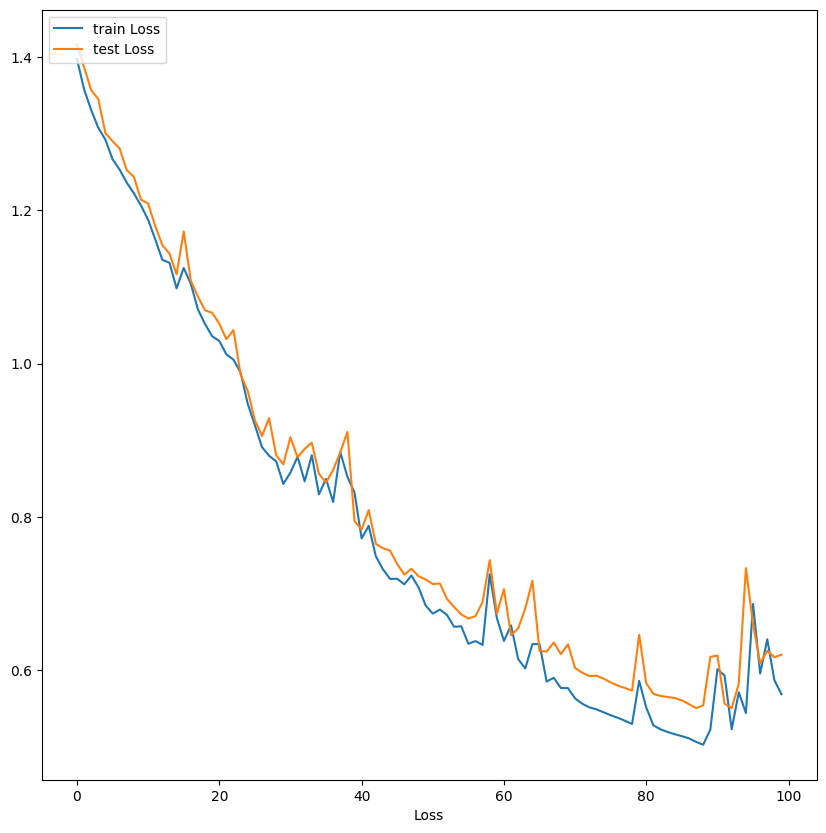

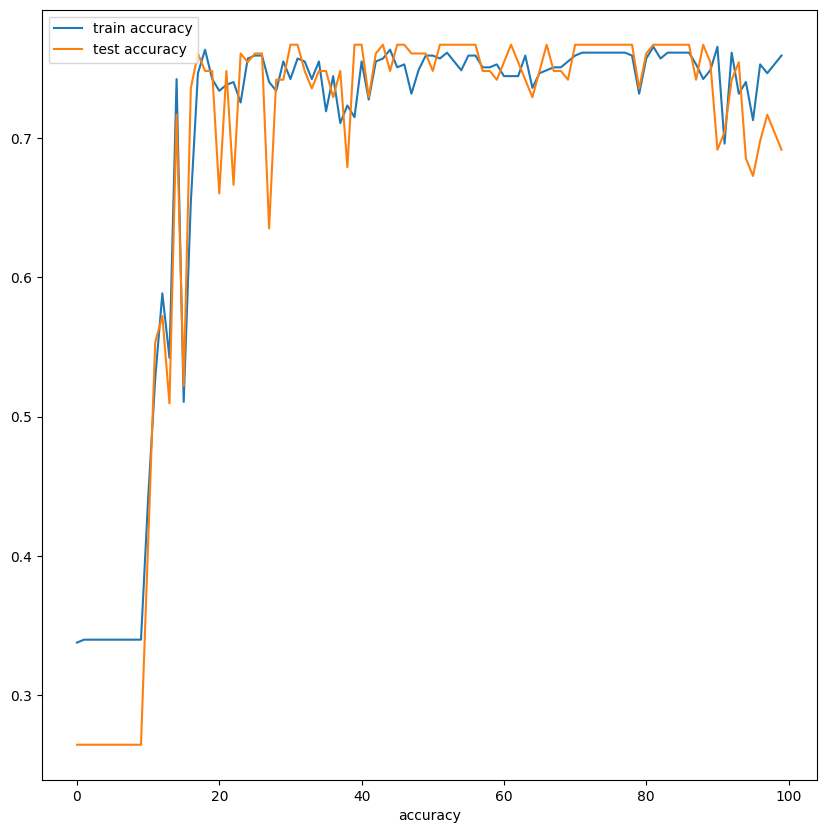

In [38]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(firtting.history['loss'])
plt.plot(firtting.history['val_loss'])
plt.legend(['train Loss','test Loss'],loc='upper left')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.show()
#-----------------------------#
plt.figure(figsize=(10,10))
plt.plot(firtting.history['accuracy'])
plt.plot(firtting.history['val_accuracy'])
plt.legend(['train accuracy','test accuracy'],loc='upper left')
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.show()

In [51]:
import cv2
import pandas as pd

def process_video_and_csv(video_path, csv_path):
    # Read the video
    cap = cv2.VideoCapture(video_path)

    # Create a list to store frames
    frames = []

    frame_count = 0
    while cap.isOpened() and frame_count < 30:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (64, 64))
        frames.append(frame)
        frame_count += 1

    cap.release()

    # Read the CSV file and skip the first two columns
    from numpy import genfromtxt
    df = genfromtxt(csv_path, delimiter=',')
    df=df[:,2:]
    return np.array(frames), np.array(df)

# Example usage
# video_path = 'D:/FYP/Data/video_frames/Data/1sec_videos/salman/video_002.mp4'
# csv_path = 'D:/FYP/Data/video_frames/Data/CSV/salman/video_007.csv'
video_path = 'C:\\Users\\alisu\\Desktop\\Fused\data\\videos\\ali\\video_001.mp4'
csv_path = 'C:\\Users\\alisu\\Desktop\\Fused\\data\\points\\ali\\video_001.csv'

conv3d_input, lstm_input = process_video_and_csv(video_path, csv_path)
print("Number of frames:",conv3d_input.shape)
print("CSV data:")
print(lstm_input.shape)


Number of frames: (30, 64, 64, 3)
CSV data:
(30, 51)


In [52]:
# Prediction code
def predict_with_fused_model(fused_model, conv3d_input, lstm_input):
    conv3d_input = np.expand_dims(conv3d_input, axis=0)
    lstm_input = np.expand_dims(lstm_input, axis=0)
    predictions = fused_model.predict([conv3d_input, lstm_input])
    return predictions



predictions = predict_with_fused_model(fused_model, conv3d_input, lstm_input)
print(predictions)
print(len(predictions[0]))


1/1 [==============================] - 0s 341ms/step
[[0.8581041  0.02928549 0.03454227 0.07806811]]
4


In [53]:
predictions = predictions.squeeze().tolist()


In [54]:
for i in range(len(predictions)):
    print(f"The Probability of {class_label[i]} is {predictions[i]*100:.2f}%")

The Probability of ali is 85.81%
The Probability of huzaifa is 2.93%
The Probability of junaid is 3.45%
The Probability of salman is 7.81%
